In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm

In [4]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Actual CPI Value')
    plt.plot(predicted, color='blue',label='Predicted CPI Value')
    plt.title("Malaysia's CPI Value")
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    
def return_analysis(test,predicted):
    e=predicted-test
    mse_f = np.mean(e**2)
    mae_f = np.mean(abs(e))
    mape_f = np.mean(abs(e/predicted))*100
    rmse_f = np.sqrt(mse_f)
    r2_f = 1-(sum(e**2)/sum((predicted-np.mean(predicted))**2))
    print("The root mean squared error is {}.".format(rmse_f))
    print("The mean absolute error is {}.".format(mae_f))
    print("The mean absolute percentage error is {}.".format(mape_f), "%") 

In [5]:
# Read in the weather data csv - keep only the columns we need
df=pd.read_csv('/Users/chamyingchyi/Desktop/Academic Purpose/FYP/Dataset/Cleaned_Data.csv', encoding='utf-8')
df1=df[["Date","CPI"]]
df2=df1[0:657]
df3=df1[0:525]
print(df2)

       Date    CPI
0    Jan-68   23.4
1    Feb-68   23.3
2    Mar-68   23.3
3    Apr-68   23.2
4    May-68   23.0
..      ...    ...
652  May-22  126.6
653  Jun-22  127.4
654  Jul-22  127.9
655  Aug-22  128.2
656  Sep-22  128.3

[657 rows x 2 columns]


In [6]:
# Checking for missing values
training_set = df2.iloc[0:525,1:2].values
test_set =df2.iloc[525:657,1:2].values

#print(training_set,test_set)
print(test_set)
len(test_set)

[[104. ]
 [104.1]
 [104.2]
 [104.5]
 [104.5]
 [104.5]
 [104.5]
 [104.7]
 [104.8]
 [104.8]
 [105. ]
 [105.2]
 [105.4]
 [105.5]
 [105.5]
 [105.9]
 [106.1]
 [106.2]
 [106.3]
 [106.6]
 [106.7]
 [106.9]
 [107. ]
 [107.9]
 [108.3]
 [108.6]
 [108.9]
 [109.5]
 [109.8]
 [109.9]
 [109.9]
 [110. ]
 [110.2]
 [110.3]
 [110.5]
 [110.7]
 [111.3]
 [111.9]
 [111.8]
 [110.6]
 [109.9]
 [110.9]
 [111.9]
 [112.3]
 [113. ]
 [113.9]
 [113.9]
 [113.6]
 [114.1]
 [114.8]
 [114.8]
 [114.5]
 [114.5]
 [113.8]
 [114.3]
 [114.6]
 [114.8]
 [115.1]
 [115.6]
 [115.3]
 [115.7]
 [116.8]
 [116.8]
 [118.1]
 [119.6]
 [119.4]
 [119.2]
 [119. ]
 [118.7]
 [118.7]
 [119.8]
 [120.1]
 [120. ]
 [120.8]
 [120.9]
 [121.3]
 [121.3]
 [120.9]
 [120.9]
 [121.1]
 [119.6]
 [119.8]
 [120. ]
 [120.5]
 [120.7]
 [121. ]
 [121.1]
 [120.5]
 [120.8]
 [121.1]
 [121.1]
 [121.4]
 [121.4]
 [121.5]
 [121.8]
 [121.8]
 [122. ]
 [122.1]
 [122.3]
 [122.4]
 [122.4]
 [120.9]
 [117.6]
 [117.9]
 [119.1]
 [119.9]
 [120.1]
 [120.1]
 [120.2]
 [120. ]
 [120.6]
 

132

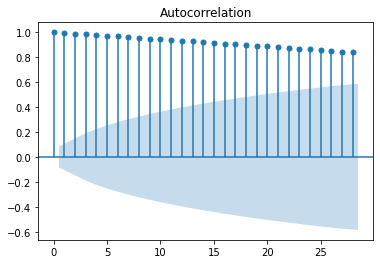

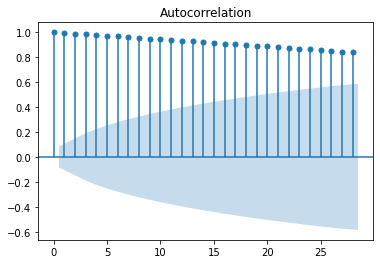

In [7]:
#determine the acf plot of data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(training_set)

In [1]:
#1st diff
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title("1st order differencing")
ax1.plot(df3.CPI.diff())

ax2=f.add_subplot(122)
ax2.set_title("ACF of 1st order differencing")
plot_acf(df3.CPI.diff().dropna(),ax=ax2)

#


NameError: name 'plt' is not defined

In [8]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(df3.CPI.dropna())
print("p-value of training set=",result1[1])

result2 = adfuller(df3.CPI.diff().dropna())
print("p-value of 1st order diffencing plot=",result2[1])

result3 = adfuller(df3.CPI.diff().diff().dropna())
print("p-value of 2nd order differencing plot=",result3[1])

p-value of training set= 0.9970928803740905
p-value of 1st order diffencing plot= 1.9112100831066858e-29
p-value of 2nd order differencing plot= 3.639417477105073e-17


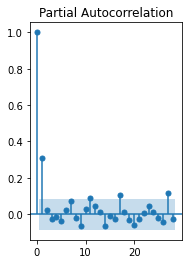

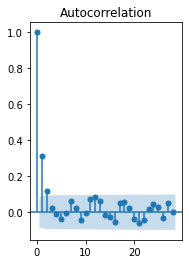

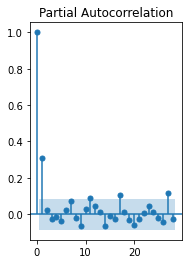

In [9]:
#1st diff
f=plt.figure()
ax2=f.add_subplot(122)
ax2.set_title("ACF of 1st order differencing")
plot_acf(df3.CPI.diff().dropna(),ax=ax2)

f=plt.figure()
ax3=f.add_subplot(122)
ax3.set_title("PACF of 1st order differencing")
plot_pacf(df3.CPI.diff().dropna(),ax=ax3)

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model_gof=np.empty((16,4))
model_gof1=model_gof[:,0].astype(str)

for i in range (0,4):
    for j in range (0,4):
        x=i
        y=j
        d = "ARIMA(" + repr(x) +",1,"+ repr(y) +")"
        arima_fit= ARIMA(df3.CPI,order=(i,1,j))
        model = arima_fit.fit()
        print(d)
        print("AIC=",model.aic)
        print("BIC=",model.bic)
        
        model_gof[(4*i)+j,1]=model.aic
        model_gof[(4*i)+j,2]=model.bic
        model_gof[(4*i)+j,3]=model.hqic

        
print(model_gof)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65103D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      4      1     0     0   4.441D-08   1.651D-01
  F =  0.16510261634198242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0,1,0)
AIC= 177.0275419263976
BIC= 185.55052529503968
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 var

 This problem is unconstrained.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)



At iterate    5    f=  1.14027D-01    |proj g|=  2.75778D-04

At iterate   10    f=  1.14026D-01    |proj g|=  1.51268D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   2.220D-08   1.140D-01
  F =  0.11402647986222075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1,1,1)
AIC= 127.49975089560735
BIC= 144.54571763289152
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13801D-01    |proj g|=  5.37179D-03

At itera

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1,1,2)
AIC= 129.25094463390428
BIC= 150.5584030555095
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30088D-01    |proj g|=  1.98953D+00


 This problem is unconstrained.



At iterate    5    f=  1.20469D-01    |proj g|=  3.24914D-01

At iterate   10    f=  1.18182D-01    |proj g|=  2.74645D-01

At iterate   15    f=  1.14186D-01    |proj g|=  2.00947D-01

At iterate   20    f=  1.13574D-01    |proj g|=  1.14538D-02

At iterate   25    f=  1.13508D-01    |proj g|=  1.24969D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     52      1     0     0   7.616D-06   1.135D-01
  F =  0.11350828298480065     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unc

ARIMA(1,1,3)
AIC= 130.95668056807108
BIC= 156.52563067399734
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13997D-01    |proj g|=  7.31191D-03

At iterate    5    f=  1.13992D-01    |proj g|=  1.94289D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   6.523D-08   1.140D-01
  F =  0.11399242135952008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2,1,0)
AIC= 127.46405758477704
BIC= 144.5100243220612
RUNNING THE

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)



At iterate   15    f=  1.13828D-01    |proj g|=  5.12035D-05

At iterate   20    f=  1.13828D-01    |proj g|=  2.08167D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     33      1     0     0   2.082D-08   1.138D-01
  F =  0.11382756635163192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2,1,1)
AIC= 129.29128953651025
BIC= 150.59874795811547


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17860D-01    |proj g|=  7.17375D-01

At iterate    5    f=  1.14415D-01    |proj g|=  6.60152D-02

At iterate   10    f=  1.14339D-01    |proj g|=  1.24633D-02

At iterate   15    f=  1.14083D-01    |proj g|=  1.32221D-01

At iterate   20    f=  1.13262D-01    |proj g|=  1.69875D-02

At iterate   25    f=  1.13226D-01    |proj g|=  6.99844D-03

At iterate   30    f=  1.13120D-01    |proj g|=  5.47823D-04

At iterate   35    f=  1.13120D-01    |proj g|=  7.52870D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2,1,2)
AIC= 130.54948129602076
BIC= 156.11843140194702


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19707D-01    |proj g|=  9.73485D-01

At iterate    5    f=  1.14964D-01    |proj g|=  6.18377D-02

At iterate   10    f=  1.14676D-01    |proj g|=  9.19210D-02

At iterate   15    f=  1.13561D-01    |proj g|=  1.36241D-02

At iterate   20    f=  1.13524D-01    |proj g|=  1.07383D-02

At iterate   25    f=  1.13044D-01    |proj g|=  5.57547D-03

At iterate   30    f=  1.12938D-01    |proj g|=  3.28265D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


ARIMA(2,1,3)
AIC= 132.3589944922976
BIC= 162.18943628254488
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13752D-01    |proj g|=  1.08873D-02

At iterate    5    f=  1.13742D-01    |proj g|=  4.53387D-06

At iterate   10    f=  1.13742D-01    |proj g|=  4.30211D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   4.302D-08   1.137D-01
  F =  0.11374180380953311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(3,1,

 This problem is unconstrained.



At iterate    5    f=  1.13993D-01    |proj g|=  3.60268D-03

At iterate   10    f=  1.13989D-01    |proj g|=  4.95104D-05

At iterate   15    f=  1.13986D-01    |proj g|=  1.54072D-03

At iterate   20    f=  1.13920D-01    |proj g|=  5.13457D-04

At iterate   25    f=  1.13919D-01    |proj g|=  2.99483D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     48      1     0     0   4.566D-07   1.139D-01
  F =  0.11391946755334058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(3,1,1)
AIC= 131.38760199590092
BIC= 156.95655210182719


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24325D-01    |proj g|=  1.53211D+00

At iterate    5    f=  1.13882D-01    |proj g|=  4.98141D-02

At iterate   10    f=  1.13306D-01    |proj g|=  1.76629D-02


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  1.12795D-01    |proj g|=  4.54678D-03

At iterate   20    f=  1.12787D-01    |proj g|=  1.22878D-02

At iterate   25    f=  1.12773D-01    |proj g|=  1.29030D-02

At iterate   30    f=  1.12762D-01    |proj g|=  2.85323D-04

At iterate   35    f=  1.12758D-01    |proj g|=  6.12713D-03

At iterate   40    f=  1.12674D-01    |proj g|=  2.91731D-03

At iterate   45    f=  1.12668D-01    |proj g|=  3.72347D-04

At iterate   50    f=  1.12625D-01    |proj g|=  1.18633D-04

At iterate   55    f=  1.12625D-01    |proj g|=  2.86438D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     55    100   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 's

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22295D-01    |proj g|=  1.41651D+00

At iterate    5    f=  1.15299D-01    |proj g|=  1.67021D-01

At iterate   10    f=  1.12873D-01    |proj g|=  9.01466D-02


 This problem is unconstrained.



At iterate   15    f=  1.12778D-01    |proj g|=  1.68036D-02

At iterate   20    f=  1.12470D-01    |proj g|=  5.08082D-02

At iterate   25    f=  1.12244D-01    |proj g|=  1.84045D-03

At iterate   30    f=  1.12197D-01    |proj g|=  1.49229D-03

At iterate   35    f=  1.12194D-01    |proj g|=  6.34067D-03

At iterate   40    f=  1.12116D-01    |proj g|=  2.44000D-02

At iterate   45    f=  1.12065D-01    |proj g|=  1.99084D-03

At iterate   50    f=  1.12064D-01    |proj g|=  4.18832D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     70      1     0     0   7.398D-06   1.121D-01
  F =  0.112064244717

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [72]:
#model1.aicc


arima_fit= ARIMA(df3.CPI,order=(1,1,0))
model2=arima_fit.fit()

print(model2)

#model_gof

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14249D-01    |proj g|=  5.95580D-03

At iterate    5    f=  1.14247D-01    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   4.441D-08   1.142D-01
  F =  0.11424671070666789     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


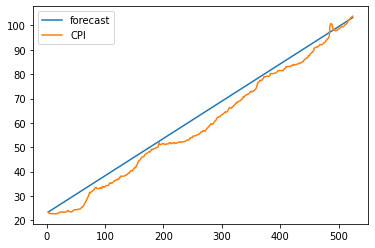

In [80]:
model2.plot_predict(dynamic=True)
plt.xlim(525,657)
plt.ylim(100,130)
plt.show()



In [82]:
y_pre = np.array(model2.forecast(132)[0])

y_pred = np.reshape(y_pre,(132,1))
y_true = test_set


y_pred

array([[103.96779022],
       [104.12556598],
       [104.28022812],
       [104.4339222 ],
       [104.58731528],
       [104.74061479],
       [104.8938852 ],
       [105.04714656],
       [105.20040512],
       [105.35366279],
       [105.5069202 ],
       [105.66017752],
       [105.81343482],
       [105.9666921 ],
       [106.11994939],
       [106.27320667],
       [106.42646396],
       [106.57972124],
       [106.73297852],
       [106.88623581],
       [107.03949309],
       [107.19275037],
       [107.34600766],
       [107.49926494],
       [107.65252222],
       [107.80577951],
       [107.95903679],
       [108.11229407],
       [108.26555136],
       [108.41880864],
       [108.57206592],
       [108.72532321],
       [108.87858049],
       [109.03183777],
       [109.18509506],
       [109.33835234],
       [109.49160962],
       [109.64486691],
       [109.79812419],
       [109.95138147],
       [110.10463876],
       [110.25789604],
       [110.41115332],
       [110

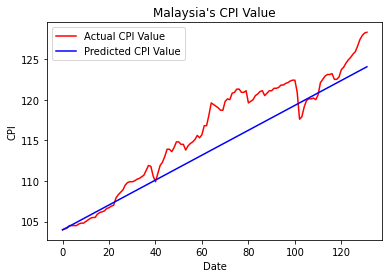

In [83]:
plot_predictions(test_set,y_pred)

In [84]:
return_analysis(test_set,y_pred)

The root mean squared error is 2.766389332327826.
The mean absolute error is 2.2328888072223934.
The mean absolute percentage error is 1.9323651946158216. %
